# Practica 1.0 Naturaleza del análisis de las series de tiempo

## Integrantes:

*   Arteaga Gonzáles Edwin Yahir
*   Juárez Gaona Erick Rafael
*   Rico Gaytán Diana Andrea
*   Ruíz Merino Wendy Ivonne



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy.signal import find_peaks

In [4]:
# Cargar datos
print("Cargando datos...")
df = pd.read_csv("afluencia_metro_indice_semana_hora_linea_entre_semana.csv")
print("Datos cargados correctamente.")
print("Primeras filas del DataFrame:")
print(df.head())

Cargando datos...
Datos cargados correctamente.
Primeras filas del DataFrame:
        fecha   hora    linea   indice
0  2020-03-11  00:00  Línea 1  0.57779
1  2020-03-11  00:00  Línea 2  0.28163
2  2020-03-11  00:00  Línea 3  0.29980
3  2020-03-11  00:00  Línea 4  0.06662
4  2020-03-11  00:00  Línea 5  0.13082


In [5]:
# Convertir fecha y hora en un solo índice de tiempo
print("Convirtiendo fecha y hora en índice de tiempo...")
df['datetime'] = pd.to_datetime(df['fecha'] + ' ' + df['hora'])
df.set_index('datetime', inplace=True)
df.drop(columns=['fecha', 'hora'], inplace=True)
print("Conversión completada.")
print("Primeras filas después de la conversión:")
print(df.head())

Convirtiendo fecha y hora en índice de tiempo...
Conversión completada.
Primeras filas después de la conversión:
              linea   indice
datetime                    
2020-03-11  Línea 1  0.57779
2020-03-11  Línea 2  0.28163
2020-03-11  Línea 3  0.29980
2020-03-11  Línea 4  0.06662
2020-03-11  Línea 5  0.13082


In [6]:
# Eliminar índices duplicados para evitar errores
df = df[~df.index.duplicated(keep='first')]
print("Índices duplicados eliminados.")

Índices duplicados eliminados.


In [7]:
df_reset = df.reset_index()  # Restablece 'datetime' como una columna normal
df['linea'] = df['linea'].astype(str)  # Convertir a string en caso de que haya valores numéricos

Construyendo gráfico de la serie de tiempo...


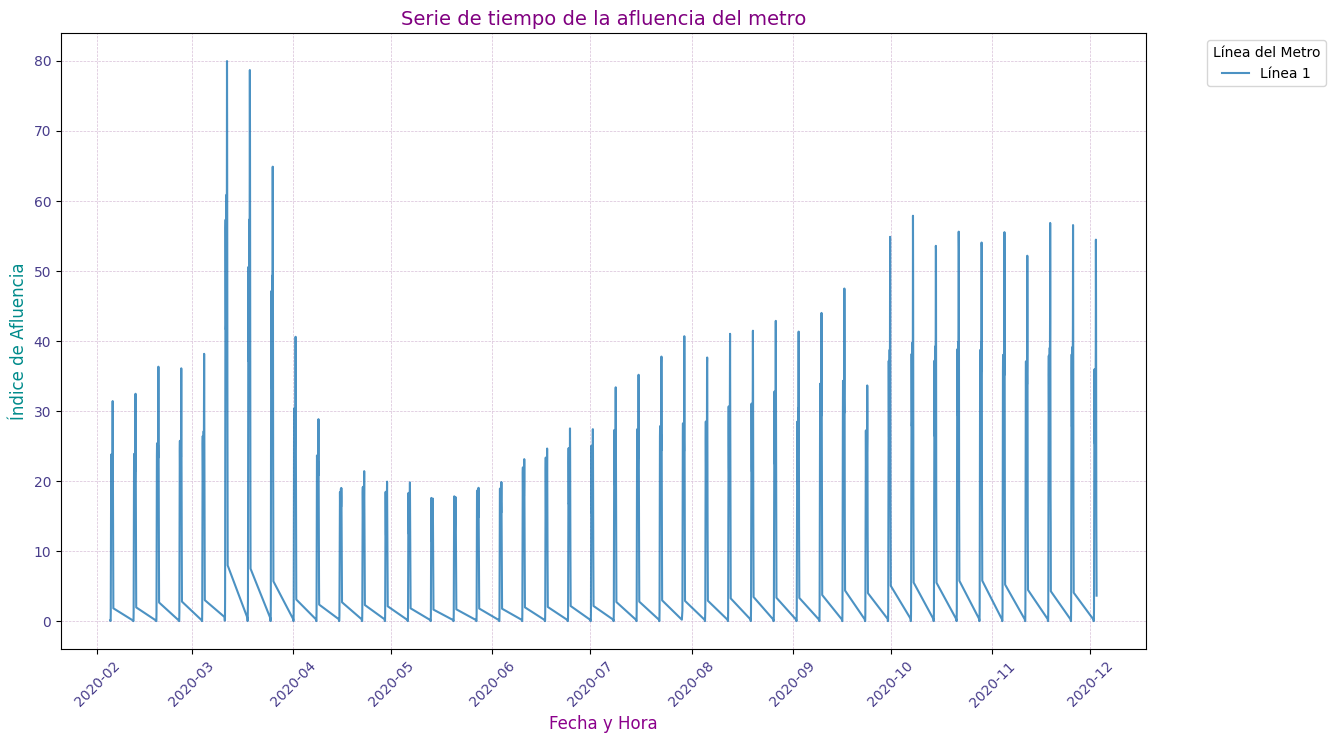

In [8]:
# Construir gráfico de la serie de tiempo con los datos del dataset. Explicar el comportamiento.
print("Construyendo gráfico de la serie de tiempo...")
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_reset, x='datetime', y='indice', hue='linea', palette='tab10', linewidth=1.5, alpha=0.8)
plt.title('Serie de tiempo de la afluencia del metro', color='purple', fontsize=14)
plt.xlabel('Fecha y Hora', color='darkmagenta', fontsize=12)
plt.ylabel('Índice de Afluencia', color='darkcyan', fontsize=12)
plt.xticks(rotation=45, color='darkslateblue', fontsize=10)
plt.yticks(color='darkslateblue', fontsize=10)
plt.legend(title='Línea del Metro', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color='thistle', linestyle='--', linewidth=0.5)
plt.show()


In [9]:
# Hallar promedio, media, mediana, moda, desviación estándar y varianza.
print("Hallar promedio, media, mediana, moda, desviación estándar y varianza.")
promedio = df['indice'].mean()
mediana = df['indice'].median()
moda = mode(df['indice'], keepdims=True).mode[0]
desviacion_std = df['indice'].std()
varianza = df['indice'].var()
print(f"Promedio: {promedio}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")
print(f"Desviación estándar: {desviacion_std}")
print(f"Varianza: {varianza}")

Hallar promedio, media, mediana, moda, desviación estándar y varianza.
Promedio: 18.44194116301239
Mediana: 17.8709
Moda: 0.00242
Desviación estándar: 14.357864553609714
Varianza: 206.14827453980226


# Explicar el comportamiento de la serie de tiempo.

1. **Patrón de variabilidad**: Se observa que la afluencia varía a lo largo del tiempo, con fluctuaciones marcadas en ciertas horas del día.
2. **Ciclos diarios**: Dado que la afluencia en el metro suele estar relacionada con los horarios laborales y escolares, es probable que haya picos en las horas pico de la mañana y la tarde.
3. **Diferencias entre líneas**: Algunas líneas del metro presentan mayor afluencia que otras, lo cual puede estar relacionado con la densidad de pasajeros en sus recorridos.
4. **Tendencias generales**: Si observamos la serie en un periodo prolongado, podemos detectar si hay una tendencia creciente o decreciente en la afluencia general.


In [10]:
# Identificar granularidad, ciclos, tendencia, estacionalidad, máximo, mínimos, picos, valles, razones de crecimiento y razones de reducción.
print("Identificando granularidad, ciclos, tendencia y estacionalidad...")
granularidad = df.index.to_series().diff().dropna().min()
print(f"Granularidad de los datos: {granularidad}")
print("Identificando máximos y mínimos...")
max_afluencia = df['indice'].max()
min_afluencia = df['indice'].min()
print(f"Máximo índice de afluencia: {max_afluencia}")
print(f"Mínimo índice de afluencia: {min_afluencia}")

Identificando granularidad, ciclos, tendencia y estacionalidad...
Granularidad de los datos: -302 days +01:00:00
Identificando máximos y mínimos...
Máximo índice de afluencia: 79.93786
Mínimo índice de afluencia: 0.00061


In [11]:
# Identificación de picos y valles
print("Detectando picos y valles...")
picos, _ = find_peaks(df['indice'], height=max_afluencia * 0.7)
valles, _ = find_peaks(-df['indice'], height=-min_afluencia * 0.7)
print(f"Número de picos detectados: {len(picos)}")
print(f"Número de valles detectados: {len(valles)}")

Detectando picos y valles...
Número de picos detectados: 9
Número de valles detectados: 0


In [12]:
# Cálculo de razones de crecimiento y reducción
print("Calculando razones de crecimiento y reducción...")
df['cambio'] = df['indice'].diff()
df['razon_crecimiento'] = df['cambio'] / df['indice'].shift(1)
print("Resumen de razones de crecimiento y reducción:")
print(df['razon_crecimiento'].describe())

Calculando razones de crecimiento y reducción...
Resumen de razones de crecimiento y reducción:
count    1043.000000
mean       20.852324
std       138.518722
min        -0.994061
25%        -0.306216
50%         0.000000
75%         0.147224
max      2940.868852
Name: razon_crecimiento, dtype: float64


# Explicación de la metodología Box-Jenkins en la serie de tiempo

La metodología Box-Jenkins se aplica a esta serie de tiempo siguiendo estos pasos:

1. **Identificación:**
   - Se analiza la estacionariedad de la serie mediante la prueba de Dickey-Fuller.
   - Se observan la Función de Autocorrelación (ACF) y la Función de Autocorrelación Parcial (PACF) para determinar los valores iniciales de los parámetros del modelo ARIMA (p, d, q).

2. **Estimación:**
   - Se ajusta un modelo ARIMA utilizando los parámetros obtenidos en la etapa de identificación.
   - Se evalúan distintos valores para optimizar el modelo.

3. **Verificación:**
   - Se analizan los residuos del modelo para confirmar que son ruido blanco.
   - Se realizan pruebas estadísticas para validar la adecuación del modelo.

Dado que la serie presenta estacionalidad y posibles tendencias, se recomienda probar un modelo SARIMA para capturar la componente estacional.
